      leo_score else qs_score
0             0    0        0
1             0    0        0
2             0    0        0
3             0    0        0
4             0    0        0
...         ...  ...      ...
46486         5    0        2
46487         5    0        0
46488         5    0        0
46489         5    0        0
46490         5    0        1

[46098 rows x 3 columns]
[[ 1286   108    40    24    92]
 [  645   507   475    58   135]
 [ 1148   791 15568  7913   663]
 [  176    51   440  5894   171]
 [  675   845  1284   121  6988]]
[[0.82967742 0.06967742 0.02580645 0.01548387 0.05935484]
 [0.3543956  0.27857143 0.26098901 0.03186813 0.07417582]
 [0.04401334 0.03032627 0.59686386 0.30337768 0.02541886]
 [0.02614379 0.00757576 0.06535948 0.8755199  0.02540107]
 [0.0680924  0.0852416  0.12952688 0.01220619 0.70493292]]


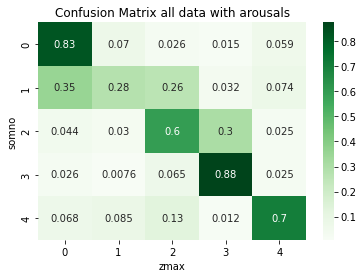

In [1]:
#good data leonora vs zmax

# -*- coding: utf-8 -*-
"""
Created on Sun Jan  2 03:51:45 2022

@author: user
"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn

list_of_nights = [11, 19, 32, 38, 57, 59, 73, 81, 83, 84, 85, 87, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]
# no 23 86 70
dfLeonora = pd.DataFrame(columns=['scorer', 'else'])

dfQs = pd.DataFrame(columns=['scorer'])

for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

    dfLeonora = dfLeonora.append(df_Konsens, ignore_index=True)


# Here i download all txtcsv as pandas dataframes
    df_scorer1= pd.read_csv('redact_qs1_'+i+'.txt', delimiter='\t')
    dfQs = dfQs.append(df_scorer1, ignore_index=True)

dfLeonora_negative = dfLeonora.loc[(dfLeonora['scorer'] < 0)].index
dfQs_negative = dfQs.loc[(dfQs['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
df_all_negative_values_to_drop = dfLeonora_negative.union(dfQs_negative)

dfLeonora = dfLeonora[~dfLeonora.index.isin(df_all_negative_values_to_drop)]
dfQs = dfQs[~dfQs.index.isin(df_all_negative_values_to_drop)]


dfLeonora = dfLeonora.rename(columns={'scorer': 'leo_score'})
dfQs = dfQs.rename(columns={'scorer': 'qs_score'})



AllNightsDF = pd.concat([dfLeonora, dfQs], axis=1,)



AllNightsDF = AllNightsDF.drop(columns='Unnamed: 0')
print (AllNightsDF)

leo_score = AllNightsDF['leo_score'].tolist()
qs_score = AllNightsDF['qs_score'].tolist()
df_confusion = confusion_matrix(leo_score, qs_score)
print (df_confusion)
cmn = df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis]
print (cmn)

sn.heatmap(cmn, annot=True)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('zmax');ax.set_ylabel('somno'); 
ax.set_title('Confusion Matrix all data with arousals'); 


[[ 1250   105    40    22    89]
 [  308   488   356    40   123]
 [  720   770 15159  7797   646]
 [   86    51   419  5862   168]
 [  450   801  1225   118  6703]]
[[0.83001328 0.06972112 0.02656042 0.01460823 0.05909695]
 [0.23422053 0.37110266 0.27072243 0.03041825 0.09353612]
 [0.0286944  0.03068707 0.60413678 0.31073649 0.02574526]
 [0.013058   0.0077437  0.0636198  0.89006985 0.02550865]
 [0.04840271 0.08615682 0.13176293 0.01269227 0.72098526]]
   qs_score  leo_score
0      2814       1506
1      2215       1315
2     17199      25092
3     13839       6586
5      7729       9297


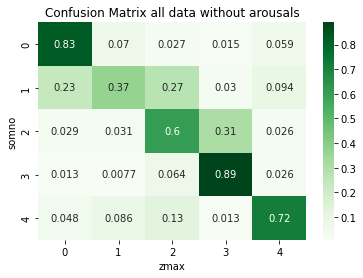

In [2]:
#now the same good data but without aro
# also value counts without aro
# value counts with aro is lat, i guess
dfLeonoraNoAro = dfLeonora.loc[(dfLeonora['else'] == 1)].index
dfLeonora = dfLeonora[~dfLeonora.index.isin(dfLeonoraNoAro)]
dfQs = dfQs[~dfQs.index.isin(dfLeonoraNoAro)]
AllNightsDFwithoutAro = pd.concat([dfLeonora, dfQs], axis=1,)

leo_score = AllNightsDFwithoutAro['leo_score'].tolist()
qs_score = AllNightsDFwithoutAro['qs_score'].tolist()
df_confusion_no_aro = confusion_matrix(leo_score, qs_score)
print (df_confusion_no_aro)

cmn_no_aro = df_confusion_no_aro.astype('float') / df_confusion_no_aro.sum(axis=1)[:, np.newaxis]
print (cmn_no_aro)

sn.heatmap(cmn_no_aro, annot=True)
ax= plt.subplot()
sn.heatmap(cmn_no_aro, annot=True, cmap="Greens")
ax.set_xlabel('zmax');ax.set_ylabel('somno'); 
ax.set_title('Confusion Matrix all data without arousals');

ValueContsDFwithoutAro = AllNightsDFwithoutAro['qs_score'].value_counts()
ValueContsDF1withoutAro = AllNightsDFwithoutAro['leo_score'].value_counts()
SZEpochNumberDFwithoutAro = pd.concat([ValueContsDFwithoutAro, ValueContsDF1withoutAro], axis = 1)


print (SZEpochNumberDFwithoutAro)
SZEpochNumberDFwithoutAro.to_csv('SZEpochNumberDFnoAro.csv', index = True, sep = '\t')

In [3]:
# good data statistics without aro
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
leo_score = AllNightsDFwithoutAro['leo_score'].tolist()
qs_score = AllNightsDFwithoutAro['qs_score'].tolist()
print ('accuracy withour Aro is ', accuracy_score(leo_score, qs_score))
print (precision_score(leo_score, qs_score, average='macro'))
print (precision_score(leo_score, qs_score, average='micro'))
print (precision_score(leo_score, qs_score, average='weighted'))
print (recall_score(leo_score, qs_score, average='macro'))
print (recall_score(leo_score, qs_score, average='micro'))
print (recall_score(leo_score, qs_score, average='weighted'))
print (f1_score(leo_score, qs_score, average='macro'))
print (f1_score(leo_score, qs_score, average='micro'))
print (f1_score(leo_score, qs_score, average='weighted'))
print (cohen_kappa_score(leo_score, qs_score))

#for cappa cofidence interval
from sklearn.metrics import confusion_matrix
import math
confusion = confusion_matrix(leo_score, qs_score)
n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

print (sum0)


w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 


expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)

agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(leo_score, qs_score) - 1.96*SE
second_interval_number = cohen_kappa_score(leo_score, qs_score) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

accuracy withour Aro is  0.6727098365147502
0.567350147015026
0.6727098365147502
0.774661577084414
0.6832615655322055
0.6727098365147502
0.6727098365147502
0.5866935046426853
0.6727098365147502
0.6923921030683002
0.5231079677590008
[ 2814  2215 17199 13839  7729]
cohen kappa is
0.5231079677590008
expected agreement is  0.3137017577180815
N is  43796
agreement is  0.6727098365147502
0.0015387782128059046
confidence interval fo kappa is from  0.5200919624619013 to  0.5261239730561004
my cohens kappa is  0.5231079677590008


In [20]:
#with aro
leo_score = AllNightsDF['leo_score'].tolist()
qs_score = AllNightsDF['qs_score'].tolist()
print ('accuracy withour Aro is ', accuracy_score(leo_score, qs_score))
print (precision_score(leo_score, qs_score, average='macro'))
print (precision_score(leo_score, qs_score, average='micro'))
print (precision_score(leo_score, qs_score, average='weighted'))
print (recall_score(leo_score, qs_score, average='macro'))
print (recall_score(leo_score, qs_score, average='micro'))
print (recall_score(leo_score, qs_score, average='weighted'))
print (f1_score(leo_score, qs_score, average='macro'))
print (f1_score(leo_score, qs_score, average='micro'))
print (f1_score(leo_score, qs_score, average='weighted'))
print (cohen_kappa_score(leo_score, qs_score))

accuracy withour Aro is  0.6560588311857347
0.5421229086797631
0.6560588311857347
0.762503465933857
0.657113105383092
0.6560588311857347
0.6560588311857347
0.5542305221364483
0.6560588311857347
0.6772053372474447
0.5048814682504592


In [4]:
#for cappa cofidence interval
from sklearn.metrics import confusion_matrix
import math
confusion = confusion_matrix(leo_score, qs_score)
n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)

print (sum0)


w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 


expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)

agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(leo_score, qs_score) - 1.96*SE
second_interval_number = cohen_kappa_score(leo_score, qs_score) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

[ 2814  2215 17199 13839  7729]
cohen kappa is
0.5231079677590008
expected agreement is  0.3137017577180815
N is  43796
agreement is  0.6727098365147502
0.0015387782128059046
confidence interval fo kappa is from  0.5200919624619013 to  0.5261239730561004
my cohens kappa is  0.5231079677590008


In [5]:
# all data nights in cms
list_of_nights = [11, 19, 32, 38, 57, 59, 73, 81, 83, 84, 85, 87, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70


for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('redact_qs1_'+i+'.txt', delimiter='\t')

    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]


    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'qs_score'})

    
    print('confusion matrix for night ' + i)
    df_confusion_night = pd.crosstab(df_Konsens['leo_score'], df_scorer1['qs_score'])
    print (df_confusion_night)

    cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
    print (cmn_night)




confusion matrix for night 11
qs_score    0   1    2    3    5
leo_score                       
0          23   1    0    0    0
1           6   3    3    0    0
2           6   0  195  139    3
3           1   0    0  130    0
5           1  22   10    0  116
qs_score          0         1         2         3         5
leo_score                                                  
0          0.958333  0.041667  0.000000  0.000000  0.000000
1          0.500000  0.250000  0.250000  0.000000  0.000000
2          0.017493  0.000000  0.568513  0.405248  0.008746
3          0.007634  0.000000  0.000000  0.992366  0.000000
5          0.006711  0.147651  0.067114  0.000000  0.778523
confusion matrix for night 19
qs_score    0   1    2   3   5
leo_score                     
0          34   7    0   0   1
1           2  15   28   0   0
2          27   6  394  48  56
3           3   0   13  88   1
5           4   4    2   0  60
qs_score          0         1         2         3         5
leo_score   

C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_n


confusion matrix for night 59
qs_score    0   1    2    3   5
leo_score                      
0          20   1    0    0   1
1          27  13    3    1   7
2           8  49  135  262   4
3           1   0    2   67   2
5           5  23   12   47  91
qs_score          0         1         2         3         5
leo_score                                                  
0          0.909091  0.045455  0.000000  0.000000  0.045455
1          0.529412  0.254902  0.058824  0.019608  0.137255
2          0.017467  0.106987  0.294760  0.572052  0.008734
3          0.013889  0.000000  0.027778  0.930556  0.027778
5          0.028090  0.129213  0.067416  0.264045  0.511236
confusion matrix for night 73
qs_score    0  1    2    3    5
leo_score                      
0          10  0    0    0    0
1          10  9    4    0    2
2          15  7  135  227   29
3           2  5    0  117   19
5          13  8   15    3  174
qs_score          0         1         2         3         5
leo_score  

C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_n

qs_score          0         1         2         3         5
leo_score                                                  
0          0.750000  0.125000  0.000000  0.000000  0.125000
1          0.357143  0.428571  0.214286  0.000000  0.000000
2          0.192308  0.000000  0.336538  0.461538  0.009615
3          0.196970  0.000000  0.000000  0.803030  0.000000
5          0.702857  0.000000  0.245714  0.000000  0.051429
confusion matrix for night 87
qs_score    0    1    2   3   5
leo_score                      
0          24    4    0   0   0
1          10    3   13   0   3
2          63  104  281  52   7
3           2    4    4  64   0
5          34    0  157   0  34
qs_score          0         1         2         3         5
leo_score                                                  
0          0.857143  0.142857  0.000000  0.000000  0.000000
1          0.344828  0.103448  0.448276  0.000000  0.103448
2          0.124260  0.205128  0.554241  0.102564  0.013807
3          0.027027  0.054

C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_n

qs_score    0   1    2    3    5
leo_score                       
0          11   2    0    0    0
1           1   3   11    1    0
2           9   0  127  257    2
3           4   0    0  117    0
5           9  20   21    0  151
qs_score          0         1         2         3         5
leo_score                                                  
0          0.846154  0.153846  0.000000  0.000000  0.000000
1          0.062500  0.187500  0.687500  0.062500  0.000000
2          0.022785  0.000000  0.321519  0.650633  0.005063
3          0.033058  0.000000  0.000000  0.966942  0.000000
5          0.044776  0.099502  0.104478  0.000000  0.751244
confusion matrix for night 21
qs_score    0  1    2    3    5
leo_score                      
0          16  1    2    0    0
1           1  4   10    6    0
2          20  2  355   84    6
3           3  0   15  146    0
5           9  6    3    1  158
qs_score          0         1         2         3         5
leo_score                          

C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_n

confusion matrix for night 35
qs_score    0   1    2    3    5
leo_score                       
0          24   1    3    0    0
1           9   9   13    0    0
2          15   2  182  193    2
3           4   0    0  101    0
5          10  16    9    0  113
qs_score          0         1         2         3         5
leo_score                                                  
0          0.857143  0.035714  0.107143  0.000000  0.000000
1          0.290323  0.290323  0.419355  0.000000  0.000000
2          0.038071  0.005076  0.461929  0.489848  0.005076
3          0.038095  0.000000  0.000000  0.961905  0.000000
5          0.067568  0.108108  0.060811  0.000000  0.763514
confusion matrix for night 36
qs_score    0  1    2    3    5
leo_score                      
0          21  1    0    0    0
1           5  5   15    0    0
2          21  6  381   32    6
3           2  1   11  100    1
5           6  1    8    0  143
qs_score          0         1         2         3         5
leo_s

C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_n

qs_score    0   1    2    3    5
leo_score                       
0           9   2    0    0    0
1           6   9    1    0    1
2          37  42  166  154   46
3           0   6    0   70   25
5           4   6    3    0  123
qs_score          0         1         2         3         5
leo_score                                                  
0          0.818182  0.181818  0.000000  0.000000  0.000000
1          0.352941  0.529412  0.058824  0.000000  0.058824
2          0.083146  0.094382  0.373034  0.346067  0.103371
3          0.000000  0.059406  0.000000  0.693069  0.247525
5          0.029412  0.044118  0.022059  0.000000  0.904412
confusion matrix for night 47
qs_score    0  1    2    3    5
leo_score                      
0          19  1    0    0    0
1           6  9    2    0    0
2           7  1  256  107    9
3           5  0    2  120    0
5           7  9   30    4  112
qs_score          0         1         2         3         5
leo_score                          

C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_n


qs_score          0         1         2         3         5
leo_score                                                  
0          0.750000  0.083333  0.083333  0.000000  0.083333
1          0.363636  0.121212  0.484848  0.000000  0.030303
2          0.013441  0.005376  0.795699  0.185484  0.000000
3          0.022901  0.000000  0.022901  0.954198  0.000000
5          0.006757  0.128378  0.195946  0.000000  0.668919
confusion matrix for night 54
qs_score    0   1    2    3   5
leo_score                      
0          13   0    0    0   0
1          28   3    4    1   1
2          12  10  173  309   7
3           3   0    0   67   5
5           9   3   53    5  74
qs_score          0         1         2         3         5
leo_score                                                  
0          1.000000  0.000000  0.000000  0.000000  0.000000
1          0.756757  0.081081  0.108108  0.027027  0.027027
2          0.023483  0.019569  0.338552  0.604697  0.013699
3          0.040000  0.00

C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_n

qs_score    0   1    2    3   5
leo_score                      
0          53   3    4    0   4
1           6   5   17    4  32
2          12   8  235  160   1
3           1   0    0   78   0
5           1  10    9    0  81
qs_score          0         1         2         3         5
leo_score                                                  
0          0.828125  0.046875  0.062500  0.000000  0.062500
1          0.093750  0.078125  0.265625  0.062500  0.500000
2          0.028846  0.019231  0.564904  0.384615  0.002404
3          0.012658  0.000000  0.000000  0.987342  0.000000
5          0.009901  0.099010  0.089109  0.000000  0.801980
confusion matrix for night 61
qs_score    0  1    2    3    5
leo_score                      
0          96  1    1    0   23
1          27  2    4    0   24
2          12  5  241  131    1
3           6  0    1   67    0
5           4  0   14    0  133
qs_score          0         1         2         3         5
leo_score                                 

C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_n


confusion matrix for night 68
qs_score    0   1    2   3    5
leo_score                      
0          13   3    0   0    1
1          21  11   12   0    0
2          18  10  360  64    6
3           1   0   13  97    0
5          17  12   15  16  112
qs_score          0         1         2         3         5
leo_score                                                  
0          0.764706  0.176471  0.000000  0.000000  0.058824
1          0.477273  0.250000  0.272727  0.000000  0.000000
2          0.039301  0.021834  0.786026  0.139738  0.013100
3          0.009009  0.000000  0.117117  0.873874  0.000000
5          0.098837  0.069767  0.087209  0.093023  0.651163
confusion matrix for night 71
qs_score    0   1    2    3    5
leo_score                       
0          12   2    0    0    0
1           7   8    6    0    0
2          13   8  349   50    0
3           3   0    6  136    0
5           5  11   30    0  160
qs_score          0         1         2         3         5
leo_

C:\Users\user\AppData\Local\Temp/ipykernel_6180/548088273.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]


[0.85302029513894, 0.08582157272277836, 0.019248367930530745, 0.012169481474298664, 0.02974028273345211, 0.34284414443313455, 0.3016662167311308, 0.26701986584860843, 0.03231126327885041, 0.05615850970827573, 0.04231191719864253, 0.028259484855744706, 0.6003437644980126, 0.3049728426921797, 0.0241119907554202, 0.028329715787232958, 0.007300320555989971, 0.0581358305275625, 0.8800019338878764, 0.026232199241338197, 0.06738186507996174, 0.08230511118432673, 0.1250358456980844, 0.011693053731300689, 0.7135841243063265]
[0.09785163330064761, 0.08619148703003783, 0.04023290595430402, 0.0352637606055613, 0.05206177790595141, 0.15502775987000403, 0.14551009863796557, 0.16204277857149876, 0.06094160912887841, 0.10195134918933575, 0.0444345936882081, 0.06994539559581672, 0.23294842875304614, 0.22713724793022735, 0.029220168066732714, 0.028197208713720483, 0.020622015168917596, 0.09388191699319641, 0.1541312199434776, 0.10779598502357832, 0.09892282552481606, 0.11758655354192754, 0.1497712295450

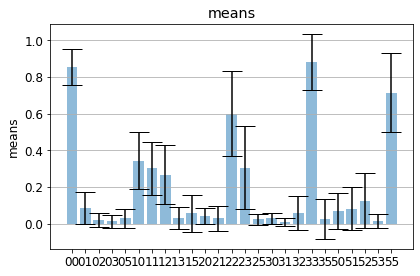

          0         1         2         3         5
0  0.853020  0.342844  0.042312  0.028330  0.067382
1  0.085822  0.301666  0.028259  0.007300  0.082305
2  0.019248  0.267020  0.600344  0.058136  0.125036
3  0.012169  0.032311  0.304973  0.880002  0.011693
5  0.029740  0.056159  0.024112  0.026232  0.713584
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.097852  0.155028  0.044435  0.028197  0.098923
1  0.086191  0.145510  0.069945  0.020622  0.117587
2  0.040233  0.162043  0.232948  0.093882  0.149771
3  0.035264  0.060942  0.227137  0.154131  0.038281
5  0.052062  0.101951  0.029220  0.107796  0.216752
list of cohens kappa
[0.5902152755961615, 0.5669267496120384, 0.48552965867668174, 0.6576623452407582, 0.5730283768603345, 0.2729800340846552, 0.4039598889843389, 0.0550354233652427, 0.05833729216152017, 0.12663262008875564, 0.11813165953785021, 0.192716680892699, 0.437797640437113, 0.6551222090814608, 0.6982717658736576, 0.450181927869

<Figure size 432x288 with 0 Axes>

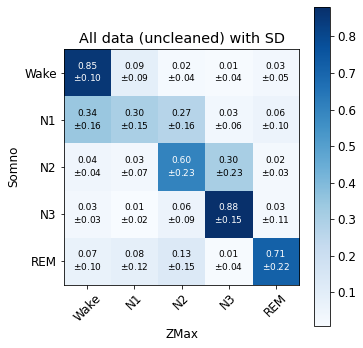

In [7]:
# all data nights in cms and mean of each list
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59, 73, 81, 83, 84, 85, 87, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('redact_qs1_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    

    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'qs_score'})

    # makeing confusion matrix for everz night 


    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['qs_score']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night


    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)


#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]

class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("All data (uncleaned) with SD")
    plt.rc('font', size=12) 
    plt.ylabel('Somno')
    plt.xlabel('ZMax')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('All_data_uncleaned_with_SD.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)
print (AllNightsDF['qs_score'].value_counts())
print (AllNightsDF['leo_score'].value_counts())

ValueContsDF = AllNightsDF['qs_score'].value_counts()
ValueContsDF1 = AllNightsDF['leo_score'].value_counts()
SZEpochNumberDF = pd.concat([ValueContsDF, ValueContsDF1], axis = 1)


print (SZEpochNumberDF)
SZEpochNumberDF.to_csv('SZEpochNumberDF.csv', index = True, sep = '\t')

[0.8558977996438978, 0.08616699850148957, 0.020046884851379825, 0.010592736502832302, 0.027295580500400467, 0.19925247347001748, 0.4219463757658789, 0.2825225445083565, 0.031206574003887943, 0.06507203225185923, 0.027287613978437358, 0.02841029231274997, 0.608142227136247, 0.31177483181043103, 0.02438503476213468, 0.014986607064439144, 0.007379359555650391, 0.056342821527569545, 0.8953155974466764, 0.025975614405664486, 0.048109297797962094, 0.0832872637042006, 0.12703840567413, 0.01196951498452401, 0.7295955178391832]
[0.09862938558223253, 0.08512083584233518, 0.04213302215369767, 0.034770651281798196, 0.052711661839718905, 0.16245698594016883, 0.20388254994585905, 0.17007908334704583, 0.07182844062545428, 0.12315227021782903, 0.04404260633339554, 0.07103319684748442, 0.23799139624866456, 0.2304375517530423, 0.029321381813098533, 0.025981386055097085, 0.020732527812837798, 0.09342268726883166, 0.1560648763841922, 0.10738038646162822, 0.09963625060069937, 0.12007911003847595, 0.1523602

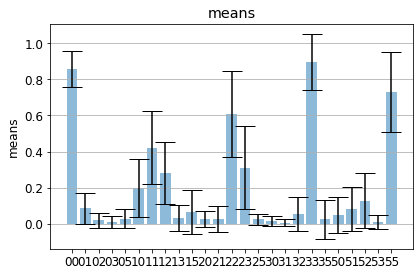

          0         1         2         3         5
0  0.855898  0.199252  0.027288  0.014987  0.048109
1  0.086167  0.421946  0.028410  0.007379  0.083287
2  0.020047  0.282523  0.608142  0.056343  0.127038
3  0.010593  0.031207  0.311775  0.895316  0.011970
5  0.027296  0.065072  0.024385  0.025976  0.729596
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.098629  0.162457  0.044043  0.025981  0.099636
1  0.085121  0.203883  0.071033  0.020733  0.120079
2  0.042133  0.170079  0.237991  0.093423  0.152360
3  0.034771  0.071828  0.230438  0.156065  0.039651
5  0.052712  0.123152  0.029321  0.107380  0.222235
list of cohens kappa
[0.60476182002598, 0.5968667042197415, 0.5002813857056061, 0.6749103417014413, 0.5940916238441687, 0.27803674750149643, 0.40597913768215343, 0.06253458771444376, 0.062169392594394135, 0.12752617508056308, 0.12324171709607568, 0.20364426818215886, 0.4494903805560583, 0.6836878401812295, 0.7198277760648373, 0.46037504

<Figure size 432x288 with 0 Axes>

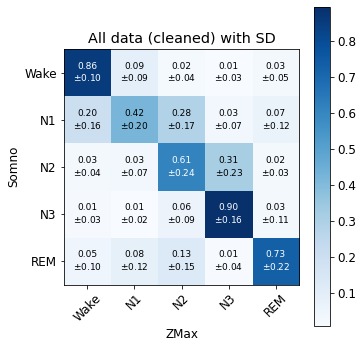

In [8]:
# all data nights in cms and mean of each list  without ARO
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
list_of_nights = [11, 19, 32, 38, 57, 59, 73, 81, 83, 84, 85, 87, 12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers_no_aro = pd.DataFrame()
df_Konsenses_no_aro = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
    #print (df_Konsens)
    #print(i)

# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('redact_qs1_'+i+'.txt', delimiter='\t')
# find all negative values

    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]

    df_KonsensNoAro = df_Konsens.loc[(df_Konsens['else'] == 1)].index
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_KonsensNoAro)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_KonsensNoAro)]


    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'qs_score'})
    df_scorers_no_aro = df_scorers_no_aro.append(df_scorer1, ignore_index=True)
    df_Konsenses_no_aro = df_Konsenses_no_aro.append(df_Konsens, ignore_index=True)

    # makeing confusion matrix for everz night 

    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['qs_score']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')
    cmn_night = df_confusion_night


    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)

# counting mean of everz list
mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]

class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=9,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("All data (cleaned) with SD")
    plt.rc('font', size=12) 
    plt.ylabel('Somno')
    plt.xlabel('ZMax')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('All_data_cleaned_with_SD.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list) 

AllNightsDF = pd.concat([df_scorers_no_aro, df_Konsenses_no_aro], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)
print (AllNightsDF['qs_score'].value_counts())
print (AllNightsDF['leo_score'].value_counts())


ValueContsDFnoAro = AllNightsDF['qs_score'].value_counts()
ValueContsDF1noAro = AllNightsDF['leo_score'].value_counts()
SZEpochNumberDFnoAro = pd.concat([ValueContsDFnoAro, ValueContsDF1noAro], axis = 1)


print (SZEpochNumberDFnoAro)
SZEpochNumberDFnoAro.to_csv('SZEpochNumberDFnoAro.csv', index = True, sep = '\t')

In [53]:
df_number_of_epochs_SZ = pd.read_csv('SZEpochNumberDF.csv', delimiter='\t')
df_number_of_epochs_SZ.columns = ['Sleep stage', 'ZMax', 'Somno consensus']
df_number_of_epochs_SZ = df_number_of_epochs_SZ[['Sleep stage','Somno consensus', 'ZMax', ]]
print (df_number_of_epochs_SZ)
df_number_of_epochs_SZ.style

   Sleep stage  Somno consensus   ZMax
0            0             1550   3930
1            1             1820   2302
2            2            26083  17807
3            3             6732  14010
4            5             9913   8049


,Sleep stage,Somno consensus,ZMax
0,0,1550,3930
1,1,1820,2302
2,2,26083,17807
3,3,6732,14010
4,5,9913,8049


In [52]:
df_number_of_epochs_SZ_no_Aro = pd.read_csv('SZEpochNumberDFnoAro.csv', delimiter='\t')
df_number_of_epochs_SZ_no_Aro.columns = ['Sleep stage', 'ZMax', 'Somno consensus']
df_number_of_epochs_SZ_no_Aro = df_number_of_epochs_SZ_no_Aro[['Sleep stage','Somno consensus', 'ZMax']]
print (df_number_of_epochs_SZ_no_Aro)
df_number_of_epochs_SZ_no_Aro.style

   Sleep stage  Somno consensus   ZMax
0            0             1506   2814
1            1             1315   2215
2            2            25092  17199
3            3             6586  13839
4            5             9297   7729


,Sleep stage,Somno consensus,ZMax
0,0,1506,2814
1,1,1315,2215
2,2,25092,17199
3,3,6586,13839
4,5,9297,7729
